<a href="https://colab.research.google.com/github/wintershine987/sea-level-rise-fisheries-AI/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global_production_quantity.csv to Global_production_quantity.csv



Correlation Matrix (rounded):
              Country_Code  Species_Code  Area_Code  Source_Code  PERIOD  \
Country_Code         1.000         0.005     -0.049       -0.036  -0.017   
Species_Code         0.005         1.000      0.030        0.004  -0.000   
Area_Code           -0.049         0.030      1.000       -0.150  -0.036   
Source_Code         -0.036         0.004     -0.150        1.000   0.038   
PERIOD              -0.017        -0.000     -0.036        0.038   1.000   
VALUE               -0.022        -0.001      0.014        0.062   0.014   

              VALUE  
Country_Code -0.022  
Species_Code -0.001  
Area_Code     0.014  
Source_Code   0.062  
PERIOD        0.014  
VALUE         1.000  


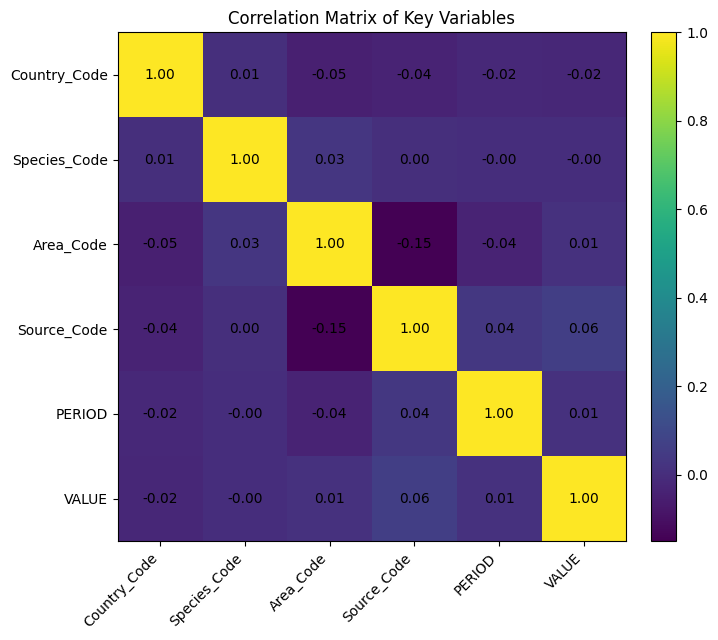

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Global_production_quantity.csv")
df = df.dropna(subset=["VALUE"]).copy()

# Column names
col_country = "COUNTRY.UN_CODE"
col_species = "SPECIES.ALPHA_3_CODE"
col_area    = "AREA.CODE"
col_source  = "PRODUCTION_SOURCE_DET.CODE"
col_year    = "PERIOD"
col_target  = "VALUE"

# Encode categoricals to numeric codes
if col_country in df.columns:
    df["Country_Code"] = df[col_country].astype("category").cat.codes
if col_species in df.columns:
    df["Species_Code"] = df[col_species].astype("category").cat.codes
if col_area in df.columns:
    df["Area_Code"] = df[col_area].astype("category").cat.codes
if col_source in df.columns:
    df["Source_Code"] = df[col_source].astype("category").cat.codes

if col_year in df.columns:
    df[col_year] = pd.to_numeric(df[col_year], errors="coerce")

# - Select variables for correlation
candidate_feats = [
    "Country_Code", "Species_Code", "Area_Code", "Source_Code",
    col_year, col_target
]
features = [c for c in candidate_feats if c in df.columns]

if len(features) < 2:
    raise ValueError("Not enough numeric features found to compute a correlation matrix.")

corr = df[features].corr(method="pearson")
corr_rounded = corr.round(3)

# Show matrix in console
print("\nCorrelation Matrix (rounded):")
print(corr_rounded)

# Heatmap with matplotlib (single plot, default colors)
plt.figure(figsize=(7.5, 6.5))
im = plt.imshow(corr.values, interpolation="nearest")  # default colormap
plt.title("Correlation Matrix of Key Variables")
plt.xticks(ticks=np.arange(len(features)), labels=features, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(features)), labels=features)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr_rounded.iat[i, j]:.2f}", ha="center", va="center")

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
